# Stock Gallery

## Data Extraction
Stock_Extractor and Portfolio_Extractor extracts the stock data from various stock API engines or local file.

In [20]:
### Import all the packages we need ###
import numpy as np
import pandas as pd
from time_series_transform.util import *
from time_series_transform.stock_transform.base import *
from time_series_transform.stock_transform.stock_extractor import *
from time_series_transform.stock_transform.plot import *

In [21]:
se = Stock_Extractor('googl', 'yahoo')
googl_stock = se.get_stock_date('2019-06-24', '2020-07-24')

pe = Portfolio_Extractor(['googl','aapl','amzn'],'yahoo')
port = pe.get_portfolio_period('1y')

### Stock Data 
After we successfully extract data from the extractor, we can start to use them for calculation and plots.


In [4]:
googl_stock.dataFrame

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol
0,2015-06-23,559.79,564.90,557.15,563.39,1569800,0,0,googl
1,2015-06-24,562.48,562.64,556.81,558.57,1446200,0,0,googl
2,2015-06-25,560.30,563.14,557.46,557.95,1334200,0,0,googl
3,2015-06-26,559.71,560.00,551.85,553.06,2183800,0,0,googl
4,2015-06-29,546.75,550.90,540.24,541.25,1887800,0,0,googl
...,...,...,...,...,...,...,...,...,...
1276,2020-07-17,1516.91,1523.43,1498.10,1516.85,1713200,0,0,googl
1277,2020-07-20,1515.00,1569.01,1502.70,1563.84,1508300,0,0,googl
1278,2020-07-21,1585.03,1587.05,1552.62,1555.92,1377700,0,0,googl
1279,2020-07-22,1555.71,1566.98,1543.23,1564.85,1224100,0,0,googl


In [22]:
googl_stock.make_technical_indicator('Close','mvg10',moving_average,windowSize = 10)
googl_stock.make_technical_indicator('Close','mvg30',moving_average,windowSize = 30)
googl_stock.make_technical_indicator('Close','fft',rfft_transform)
googl_stock.make_technical_indicator('Close','stochastic_oscillator',stochastic_oscillator)

googl_stock.dataFrame

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,mvg10,mvg30,fft,stochastic_oscillator_k_val,stochastic_oscillator_d_val,symbol
0,2019-06-24,1120.00,1123.57,1113.31,1116.70,1211800,0,0,NaN,NaN,1279.066925,NaN,NaN,googl
1,2019-06-25,1115.08,1115.70,1084.60,1087.58,1582200,0,0,NaN,NaN,1213.865354,NaN,NaN,googl
2,2019-06-26,1091.00,1095.12,1073.69,1080.32,1734900,0,0,NaN,NaN,1156.836422,NaN,NaN,googl
3,2019-06-27,1086.75,1088.46,1075.85,1076.63,1203900,0,0,NaN,NaN,1112.026770,NaN,NaN,googl
4,2019-06-28,1077.23,1082.80,1073.80,1082.80,1683600,0,0,NaN,NaN,1081.943980,NaN,NaN,googl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-07-17,1516.91,1523.43,1498.10,1516.85,1713200,0,0,1513.258,1460.296000,1552.938863,54.858423,57.916657,googl
270,2020-07-20,1515.00,1569.01,1502.70,1563.84,1508300,0,0,1519.677,1464.423333,1519.521288,100.000000,68.595097,googl
271,2020-07-21,1585.03,1587.05,1552.62,1555.92,1377700,0,0,1526.277,1468.019333,1472.150743,84.654137,79.837520,googl
272,2020-07-22,1555.71,1566.98,1543.23,1564.85,1224100,0,0,1532.402,1471.778333,1413.424052,100.000000,94.884712,googl


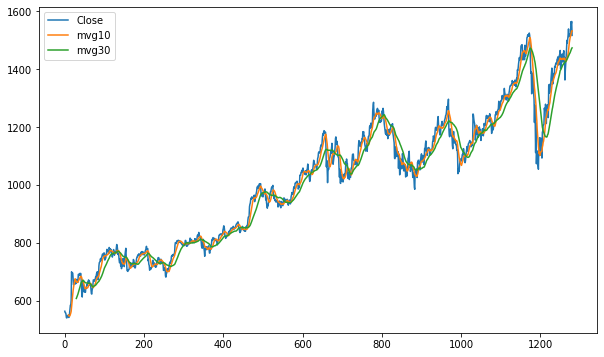

In [8]:
plot_columns = ['Close', 'mvg10', 'mvg30']
googl_stock.plot(plot_columns, figsize=(10,6))

### Portfolio Data
Portfolio have similar functionalities as Stock, but we can apply the calculations on multiple stock data

In [9]:
port.make_technical_indicator('High','mvg10',moving_average,1,50,windowSize = 10)
port.make_technical_indicator('High','fft',rfft_transform,1,50)
port.make_technical_indicator('High','wavelet',wavelet_denoising,1,50,wavelet='haar')

port.get_portfolio_dataFrame()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,mvg10,fft,wavelet,symbol
0,2019-07-31,1898.11,1899.55,1849.44,1866.78,4470700,0.0,0,NaN,NaN,1819.755625,amzn
1,2019-08-01,1871.72,1897.92,1844.01,1855.32,4713300,0.0,0,NaN,2387.989797,1819.755625,amzn
2,2019-08-02,1845.07,1846.36,1808.02,1823.24,4956200,0.0,0,NaN,2188.225262,1819.755625,amzn
3,2019-08-05,1770.22,1788.67,1748.78,1765.13,6058200,0.0,0,NaN,2009.559905,1819.755625,amzn
4,2019-08-06,1792.23,1793.77,1753.40,1787.83,5070300,0.0,0,NaN,1865.740683,1819.755625,amzn
...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-24,1499.19,1515.43,1487.59,1508.21,1495100,0.0,0,1548.365,1567.089622,1541.734375,googl
249,2020-07-27,1513.26,1537.56,1512.33,1529.43,1356200,0.0,0,1544.485,1544.932739,1541.734375,googl
250,2020-07-28,1525.00,1526.01,1500.52,1503.65,1545500,0.0,0,1544.806,1511.099042,1541.734375,googl
251,2020-07-29,1505.00,1533.33,1503.01,1523.51,1133800,0.0,0,1544.506,1466.687359,1541.734375,googl


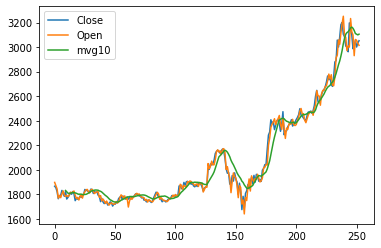

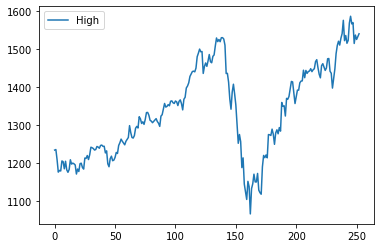

In [16]:
plot_dict = {
    'amzn' : ['Close', 'Open', 'mvg10'],
    'googl' : ['High']
}
port.plot(plot_dict)

## Plot
Plot creates the more advanced figures and is powered by Plotly.

Users are able to manually insert data into the plot or use the buildin function to draw the traces.

In [23]:
pp = Plot(googl_stock)
pp.show()

In [27]:
lines = ['mvg10', 'mvg30']
colors = ['purple', 'grey']
for i in range(len(lines)):
    pp.add_line(lines[i], colors[i], lines[i])
pp.show()

In [28]:
pp.add_macd()
pp.show()

In [29]:
pp.remove_line('mvg10')
pp.remove_subplot('macd')
pp.show()